In [148]:
import bs4 as bs
import requests
import pickle
import datetime as dt
import os
import quandl
quandl.ApiConfig.api_key = '7U4XM3-WQBjPgMFmbPtD'
import pandas as pd

    
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
%matplotlib inline


In [149]:
def GetListOfTickers(Refresh=False):
    ''' This function gets us the list of stocks from S&P500 and '''
    ''' stores it in a list for later consumption'''
    path = '/Users/atishparshotam/Google Drive/Git/JunkJuice/Data'
    if Refresh==True:
        try:
            resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
            soup = bs.BeautifulSoup(resp.text, 'lxml')
            table = soup.find('table', {'class': 'wikitable sortable'})
            tickers = []
            for row in table.findAll('tr')[1:]:
                ticker = row.findAll('td')[0].text
                tickers.append(ticker)
            with open('sp500tickers.pickle', 'wb') as f:
                pickle.dump(tickers, f)
        except:
            tickers = ["error in extraction process, check wikipedia source"]
    else:
        try:
            with open('sp500tickers.pickle', 'rb') as f:
                tickers = pickle.load(f)
        except:
             tickers = "Tickers files does not exist; please run with Refresh=True"
    return tickers

In [150]:
def GetTickerPrice(Refresh=False, Tickers=[],startDate=dt.date(2010,1,1),endDate=dt.date.today()):
    ''' This function gets us price information using Quandal'''
    ''' we pass in the tickers information from GetListOfTickers ie'''
    ''' tickers and we get a list of csv files over a date range '''
    ''' each stock is stored in its own directory in csv format'''
    ''' pass in start and end date using dt.datetime(YYYY,MM,CC) format'''

    #start = dt.datetime(2000,01,01)
    #end = dt.datetime(2000,01,01)
    path = '/Users/atishparshotam/Google Drive/Git/JunkJuice/Data/Stock_Price'

    if Refresh==True:
        # get the table for daily stock prices and,
        # filter the table for selected tickers, columns within a time range
        # set paginate to True because Quandl limits tables API to 10,000 rows per call
        try:       
            main_df = pd.DataFrame()
            for ticker in Tickers:
                # just in case your connection breaks, we'd like to save our progress!

                if not os.path.exists('Data/Stock_Price/{}.csv'.format(ticker)):
                    df = quandl.get("WIKI/" + ticker, start_date=startDate, end_date=endDate)
                    df['Ticker'] = ticker
            
                    df.index = pd.to_datetime(df.index,unit='D')
                
                    start_date = df.index.min() - pd.DateOffset(day=1)
                    end_date = df.index.max() + pd.DateOffset(day=31)
                    dates = pd.date_range(start_date, end_date, freq='D')
                    dates.name = 'Date'
                    df = df.reindex(dates, method='ffill')
        
                    print("Writing file for :" + ticker)
                    df.to_csv(os.path.join(path,r'{}.csv'.format(ticker)))
                else:
                    print('Already have {}'.format(ticker))

                if main_df.empty:
                    main_df = df
                else:
                    #main_df = main_df.join(df, how='outer', rsuffix='In')
                    main_df = pd.concat([main_df,df])

            #print(main_df.head(3))

        except:
            print( 'Ticker file ' + str(ticker) + ' had an error in extraction')
            #return(main_df)
    else:
        #read all directory and CSV files.

        try:
            main_df = pd.DataFrame()
            for count, ticker in enumerate(Tickers):
                df = pd.read_csv(os.path.join(path,r'{}.csv'.format(ticker)))
                df.set_index('Date', inplace=True)

              #  df.rename(columns={'Adj Close': ticker}, inplace=True)
              #  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

                if main_df.empty:
                    main_df = df
                else:
                    #main_df = main_df.join(df, how='outer', rsuffix='_In')
                    main_df = pd.concat([main_df,df])

                if count % 10 == 0:
                    print(count)
            #print(main_df.head(3))
        except:
            print( 'Ticker file ' + str(ticker) + ' does not exist; please run with Refresh=True')
            pass
    return(main_df)

In [151]:

# Since i can;t get the S&P500 index we will benchmark Apple against Google and treat Google as the index
stockPrice=GetTickerPrice(Refresh=True,Tickers=['AAPL','GOOG'],startDate=dt.date(2000,1,1),endDate=dt.date.today())

Writing file for :AAPL
Writing file for :GOOG


In [152]:
stockPrice.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Ticker
Date,,,,,,,,,,,,,
2018-03-27,1063.0,1064.84,996.92,1005.1,3029471.0,0.0,1.0,1063.0,1064.84,996.92,1005.1,3029471.0,GOOG
2018-03-28,1063.0,1064.84,996.92,1005.1,3029471.0,0.0,1.0,1063.0,1064.84,996.92,1005.1,3029471.0,GOOG
2018-03-29,1063.0,1064.84,996.92,1005.1,3029471.0,0.0,1.0,1063.0,1064.84,996.92,1005.1,3029471.0,GOOG
2018-03-30,1063.0,1064.84,996.92,1005.1,3029471.0,0.0,1.0,1063.0,1064.84,996.92,1005.1,3029471.0,GOOG
2018-03-31,1063.0,1064.84,996.92,1005.1,3029471.0,0.0,1.0,1063.0,1064.84,996.92,1005.1,3029471.0,GOOG


In [153]:
stockPrice.head(5)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Ticker
Date,,,,,,,,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,104.87,112.50,101.69,111.94,4783900.0,0.0,1.0,3.369314,3.614454,3.267146,3.596463,133949200.0,AAPL
2000-01-04,108.25,110.62,101.19,102.50,4574800.0,0.0,1.0,3.477908,3.554053,3.251081,3.293170,128094400.0,AAPL
2000-01-05,103.75,110.56,103.00,104.00,6949300.0,0.0,1.0,3.333330,3.552125,3.309234,3.341362,194580400.0,AAPL


In [154]:
print(stockPrice.size)
print(stockPrice.shape)

106041
(8157, 13)


In [155]:
stockPrice.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume',
       'Ticker'],
      dtype='object')

In [156]:
def GetTickerFundamental(Refresh=False, startDate=dt.date(2010,1,1),endDate=dt.date.today()):
    ''' This function gets us price information using Quandal'''
    ''' we pass in the tickers information from GetListOfTickers ie'''
    ''' tickers and we get a list of csv files over a date range '''
    ''' each stock is stored in its own directory in csv format'''
    ''' pass in start and end date using dt.datetime(YYYY,MM,CC) format'''

    path = '/Users/atishparshotam/Google Drive/Git/JunkJuice/Data/Fundamental'
    listOfFiles = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.csv'):
                file=file.split('_quarterly')[0]
                listOfFiles.append(file)
            
            
    listOfFiles = ['AAPL','GOOG']
    FundamentalDF = pd.DataFrame()
    for count, ticker in enumerate(listOfFiles):   
        df = pd.read_csv(os.path.join(path,r'{}_quarterly_financial_data.csv'.format(ticker)))
        df['Ticker'] = ticker
        df.set_index(['Quarter end'], inplace=True)
        df.index = [dt.datetime.strptime(x,'%Y-%m-%d') for x in df.index]
     
        start_date = df.index.min() - pd.DateOffset(day=1)
        end_date = df.index.max() + pd.DateOffset(day=31)
        dates = pd.date_range(start_date, end_date, freq='D')
        dates.name = 'Date'
        df = df.reindex(dates, method='ffill')

        #print(df.index)
        
        if FundamentalDF.empty:
            FundamentalDF = df
        else:
            FundamentalDF = pd.concat([FundamentalDF, df])

        if count % 10 == 0:
                print(count)
       # print(FundamentalDF.head(5))
    return(FundamentalDF)

In [157]:
stockFund = GetTickerFundamental(Refresh=False)

0


In [158]:
print(stockFund.size)
print(stockFund.shape)

578961
(14121, 41)


In [160]:
stockFund.head(5)

,Shares,Shares split adjusted,Split factor,Assets,Current Assets,Liabilities,Current Liabilities,Shareholders equity,Non-controlling interest,Preferred equity,...,P/E ratio,Cumulative dividends per share,Dividend payout ratio,Long-term debt to equity ratio,Equity to assets ratio,Net margin,Asset turnover,Free cash flow per share,Current ratio,Ticker
Date,,,,,,,,,,,,,,,,,,,,,
1993-12-01,117242991,3282803748,28,5042440000,4208007000,2989181000,2328161000,2053259000,0,0,...,None,0.004286,None,0.0,0.4072,None,None,0.1,1.8074,AAPL
1993-12-02,117242991,3282803748,28,5042440000,4208007000,2989181000,2328161000,2053259000,0,0,...,None,0.004286,None,0.0,0.4072,None,None,0.1,1.8074,AAPL
1993-12-03,117242991,3282803748,28,5042440000,4208007000,2989181000,2328161000,2053259000,0,0,...,None,0.004286,None,0.0,0.4072,None,None,0.1,1.8074,AAPL
1993-12-04,117242991,3282803748,28,5042440000,4208007000,2989181000,2328161000,2053259000,0,0,...,None,0.004286,None,0.0,0.4072,None,None,0.1,1.8074,AAPL
1993-12-05,117242991,3282803748,28,5042440000,4208007000,2989181000,2328161000,2053259000,0,0,...,None,0.004286,None,0.0,0.4072,None,None,0.1,1.8074,AAPL


In [161]:
stockFund.tail(5)

,Shares,Shares split adjusted,Split factor,Assets,Current Assets,Liabilities,Current Liabilities,Shareholders equity,Non-controlling interest,Preferred equity,...,P/E ratio,Cumulative dividends per share,Dividend payout ratio,Long-term debt to equity ratio,Equity to assets ratio,Net margin,Asset turnover,Free cash flow per share,Current ratio,Ticker
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-26,695677773,695677773,1,211610000000,124157000000,49610000000,29903000000,162000000000,0,0,...,46.19,0.0,0,0.0246,0.7656,0.1316,0.62,6.72,4.152,GOOG
2018-06-27,695677773,695677773,1,211610000000,124157000000,49610000000,29903000000,162000000000,0,0,...,46.19,0.0,0,0.0246,0.7656,0.1316,0.62,6.72,4.152,GOOG
2018-06-28,695677773,695677773,1,211610000000,124157000000,49610000000,29903000000,162000000000,0,0,...,46.19,0.0,0,0.0246,0.7656,0.1316,0.62,6.72,4.152,GOOG
2018-06-29,695677773,695677773,1,211610000000,124157000000,49610000000,29903000000,162000000000,0,0,...,46.19,0.0,0,0.0246,0.7656,0.1316,0.62,6.72,4.152,GOOG
2018-06-30,695677773,695677773,1,211610000000,124157000000,49610000000,29903000000,162000000000,0,0,...,46.19,0.0,0,0.0246,0.7656,0.1316,0.62,6.72,4.152,GOOG


In [170]:
#We need to join the dataset on the index value as well as the Ticker element.
# we could consider using a multiindex for future state....
# for now we just generate a column called Key1

stockPrice['Key1'] = stockPrice.index
stockFund['Key1'] = stockFund.index

In [189]:
# do the all important join....
stockInfo = pd.merge(stockFund, stockPrice, on =['Key1','Ticker'], suffixes= ('_F','_P'), left_index=True)

In [193]:
print(stockFund.shape)
print(stockPrice.shape)
print(stockInfo.shape)

(14121, 42)
(8157, 14)
(16133, 55)


In [194]:
stockInfo.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,...,Cumulative dividends per share,Dividend payout ratio,Long-term debt to equity ratio,Equity to assets ratio,Net margin,Asset turnover,Free cash flow per share,Current ratio,TickerF,Key1
1993-12-01,32.00,32.25,31.25,31.50,993000.0,0.0,1.0,1.002649,1.010483,0.979150,...,0.004286,None,0.0,0.4072,None,None,0.1,1.8074,AAPL,1993-12-01
1993-12-02,31.75,32.00,31.00,31.75,898700.0,0.0,1.0,0.994816,1.002649,0.971317,...,0.004286,None,0.0,0.4072,None,None,0.1,1.8074,AAPL,1993-12-02
1993-12-03,31.75,32.00,31.00,31.50,1075600.0,0.0,1.0,0.994816,1.002649,0.971317,...,0.004286,None,0.0,0.4072,None,None,0.1,1.8074,AAPL,1993-12-03
1993-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004286,None,0.0,0.4072,None,None,0.1,1.8074,AAPL,1993-12-04
1993-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004286,None,0.0,0.4072,None,None,0.1,1.8074,AAPL,1993-12-05


In [195]:
stockInfo.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,...,Cumulative dividends per share,Dividend payout ratio,Long-term debt to equity ratio,Equity to assets ratio,Net margin,Asset turnover,Free cash flow per share,Current ratio,TickerF,Key1
2018-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0,0.0246,0.7656,0.1316,0.62,6.72,4.1520,GOOG,2018-06-28
2018-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.41,0.2326,0.8450,0.3292,0.2198,0.68,2.32,1.3073,AAPL,2018-06-29
2018-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0,0.0246,0.7656,0.1316,0.62,6.72,4.1520,GOOG,2018-06-29
2018-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.41,0.2326,0.8450,0.3292,0.2198,0.68,2.32,1.3073,AAPL,2018-06-30
2018-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0,0.0246,0.7656,0.1316,0.62,6.72,4.1520,GOOG,2018-06-30


In [198]:

# check if the index on the joined table is correct and we can slice data
stockInfo['2018-01-01':'2018-01-07']


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,...,Cumulative dividends per share,Dividend payout ratio,Long-term debt to equity ratio,Equity to assets ratio,Net margin,Asset turnover,Free cash flow per share,Current ratio,TickerF,Key1
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.68,0.2397,0.7989,0.3452,0.2155,0.66,2.26,1.4560,AAPL,2018-01-01
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0,0.0247,0.7772,0.1419,0.61,6.3,4.8736,GOOG,2018-01-01
2018-01-02,170.16,172.30,169.26,172.26,25048048.0,0.0,1.0,170.16,172.30,169.26,...,11.68,0.2397,0.7989,0.3452,0.2155,0.66,2.26,1.4560,AAPL,2018-01-02
2018-01-02,1048.34,1066.94,1045.23,1065.00,1223114.0,0.0,1.0,1048.34,1066.94,1045.23,...,11.68,0.2397,0.7989,0.3452,0.2155,0.66,2.26,1.4560,AAPL,2018-01-02
2018-01-02,170.16,172.30,169.26,172.26,25048048.0,0.0,1.0,170.16,172.30,169.26,...,0.00,0,0.0247,0.7772,0.1419,0.61,6.3,4.8736,GOOG,2018-01-02
2018-01-02,1048.34,1066.94,1045.23,1065.00,1223114.0,0.0,1.0,1048.34,1066.94,1045.23,...,0.00,0,0.0247,0.7772,0.1419,0.61,6.3,4.8736,GOOG,2018-01-02
2018-01-03,172.53,174.55,171.96,172.23,28819653.0,0.0,1.0,172.53,174.55,171.96,...,11.68,0.2397,0.7989,0.3452,0.2155,0.66,2.26,1.4560,AAPL,2018-01-03
2018-01-03,1064.31,1086.29,1063.21,1082.48,1416093.0,0.0,1.0,1064.31,1086.29,1063.21,...,11.68,0.2397,0.7989,0.3452,0.2155,0.66,2.26,1.4560,AAPL,2018-01-03
2018-01-03,172.53,174.55,171.96,172.23,28819653.0,0.0,1.0,172.53,174.55,171.96,...,0.00,0,0.0247,0.7772,0.1419,0.61,6.3,4.8736,GOOG,2018-01-03
2018-01-03,1064.31,1086.29,1063.21,1082.48,1416093.0,0.0,1.0,1064.31,1086.29,1063.21,...,0.00,0,0.0247,0.7772,0.1419,0.61,6.3,4.8736,GOOG,2018-01-03


In [200]:
stockPrice['2018-01-01':'2018-01-07']

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Ticker,Key1
Date,,,,,,,,,,,,,,
2018-01-01,170.52,170.59,169.22,169.23,25643711.0,0.0,1.0,170.52,170.59,169.22,169.23,25643711.0,AAPL,2018-01-01
2018-01-02,170.16,172.30,169.26,172.26,25048048.0,0.0,1.0,170.16,172.30,169.26,172.26,25048048.0,AAPL,2018-01-02
2018-01-03,172.53,174.55,171.96,172.23,28819653.0,0.0,1.0,172.53,174.55,171.96,172.23,28819653.0,AAPL,2018-01-03
2018-01-04,172.54,173.47,172.08,173.03,22211345.0,0.0,1.0,172.54,173.47,172.08,173.03,22211345.0,AAPL,2018-01-04
2018-01-05,173.44,175.37,173.05,175.00,23016177.0,0.0,1.0,173.44,175.37,173.05,175.00,23016177.0,AAPL,2018-01-05
2018-01-06,173.44,175.37,173.05,175.00,23016177.0,0.0,1.0,173.44,175.37,173.05,175.00,23016177.0,AAPL,2018-01-06
2018-01-07,173.44,175.37,173.05,175.00,23016177.0,0.0,1.0,173.44,175.37,173.05,175.00,23016177.0,AAPL,2018-01-07
2018-01-01,1046.72,1049.70,1044.90,1046.40,867943.0,0.0,1.0,1046.72,1049.70,1044.90,1046.40,867943.0,GOOG,2018-01-01
2018-01-02,1048.34,1066.94,1045.23,1065.00,1223114.0,0.0,1.0,1048.34,1066.94,1045.23,1065.00,1223114.0,GOOG,2018-01-02


In [ ]:
There is an error on this slice
compare the data and do a join in excel to figure out what's going on here....

In [43]:
print(stockInfo.size)
print(stockInfo.shape)

871182
(16133, 54)


In [309]:
stockInfo.dropna(axis=0, how='any', inplace=True)
stockInfo.head(5)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,...,P/E ratio,Cumulative dividends per share,Dividend payout ratio,Long-term debt to equity ratio,Equity to assets ratio,Net margin,Asset turnover,Free cash flow per share,Current ratio,TickerF
2004-08-19,31.51,31.86,30.36,30.71,6945000.0,0.0,1.0,2.024737,2.047227,1.950842,...,58.95,0.03,0,0.0,0.6306,0.0333,1.14,0.07,2.6325,AAPL
2004-08-20,30.71,30.99,30.49,30.80,5656800.0,0.0,1.0,1.973332,1.991323,1.959195,...,58.95,0.03,0,0.0,0.6306,0.0333,1.14,0.07,2.6325,AAPL
2004-08-23,30.86,31.27,30.60,31.08,4547500.0,0.0,1.0,1.982970,2.009315,1.966263,...,58.95,0.03,0,0.0,0.6306,0.0333,1.14,0.07,2.6325,AAPL
2004-08-24,31.26,31.95,31.19,31.95,6681000.0,0.0,1.0,2.008673,2.053010,2.004175,...,58.95,0.03,0,0.0,0.6306,0.0333,1.14,0.07,2.6325,AAPL
2004-08-25,31.91,33.15,31.73,33.05,9028900.0,0.0,1.0,2.050440,2.130119,2.038874,...,58.95,0.03,0,0.0,0.6306,0.0333,1.14,0.07,2.6325,AAPL


In [ ]:
print(stockInfo.size)
print(stockInfo.shape)

In [311]:
#shift the prices by 90 days in both instances to calculate the rate of return in 90 days
# this goes into the label for training
stockInfo['Fwd_Price'] = stockInfo['Adj. Close'].shift(-90)
stockInfo['Fwd_Ind'] = stockInfo['Adj. CloseIn'].shift(-90)
stockInfo.head(5)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,...,Dividend payout ratio,Long-term debt to equity ratio,Equity to assets ratio,Net margin,Asset turnover,Free cash flow per share,Current ratio,TickerF,Fwd_Price,Fwd_Ind
2004-08-19,31.51,31.86,30.36,30.71,6945000.0,0.0,1.0,2.024737,2.047227,1.950842,...,0,0.0,0.6306,0.0333,1.14,0.07,2.6325,AAPL,4.124012,96.678437
2004-08-20,30.71,30.99,30.49,30.80,5656800.0,0.0,1.0,1.973332,1.991323,1.959195,...,0,0.0,0.6306,0.0333,1.14,0.07,2.6325,AAPL,4.140719,96.748654
2004-08-23,30.86,31.27,30.60,31.08,4547500.0,0.0,1.0,1.982970,2.009315,1.966263,...,0,0.0,0.6306,0.0333,1.14,0.07,2.6325,AAPL,4.163852,99.105931
2004-08-24,31.26,31.95,31.19,31.95,6681000.0,0.0,1.0,2.008673,2.053010,2.004175,...,0,0.0,0.6306,0.0333,1.14,0.07,2.6325,AAPL,4.138149,96.693484
2004-08-25,31.91,33.15,31.73,33.05,9028900.0,0.0,1.0,2.050440,2.130119,2.038874,...,0,0.0,0.6306,0.0333,1.14,0.07,2.6325,AAPL,4.066824,101.668842


In [318]:
#Calc the return in 90 days as well as the if apple beat Google by 20% in 90 days....
stockInfo['PercChg90_AAPL'] = round(((stockInfo['Fwd_Price'] - stockInfo['Adj. Close']) / stockInfo['Adj. Close'] * 100), 2)
stockInfo['PercChg90_In'] = round(((stockInfo['Fwd_Ind'] - stockInfo['Adj. CloseIn']) / stockInfo['Adj. CloseIn'] * 100), 2)

In [ ]:
#generate targets for learning Y = 0 or 1
stockInfo.loc[((stockInfo['PercChg90_AAPL'])  >= 0.03, 'Target'] = 1
stockInfo.loc[((stockInfo['PercChg90_AAPL'])  < 0.03, 'Target'] = 0

In [325]:
stockInfo.head(5)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,...,Net margin,Asset turnover,Free cash flow per share,Current ratio,TickerF,Fwd_Price,Fwd_Ind,PercChg90_AAPL,PercChg90_In,Target
2004-08-19,31.51,31.86,30.36,30.71,6945000.0,0.0,1.0,2.024737,2.047227,1.950842,...,0.0333,1.14,0.07,2.6325,AAPL,4.124012,96.678437,108.99,92.12,0.0
2004-08-20,30.71,30.99,30.49,30.80,5656800.0,0.0,1.0,1.973332,1.991323,1.959195,...,0.0333,1.14,0.07,2.6325,AAPL,4.140719,96.748654,109.22,78.10,1.0
2004-08-23,30.86,31.27,30.60,31.08,4547500.0,0.0,1.0,1.982970,2.009315,1.966263,...,0.0333,1.14,0.07,2.6325,AAPL,4.163852,99.105931,108.49,80.62,1.0
2004-08-24,31.26,31.95,31.19,31.95,6681000.0,0.0,1.0,2.008673,2.053010,2.004175,...,0.0333,1.14,0.07,2.6325,AAPL,4.138149,96.693484,101.56,83.84,1.0
2004-08-25,31.91,33.15,31.73,33.05,9028900.0,0.0,1.0,2.050440,2.130119,2.038874,...,0.0333,1.14,0.07,2.6325,AAPL,4.066824,101.668842,91.50,91.24,0.0


In [360]:
print(stockInfo.shape)
stockInfo.dropna(axis=0, how='any', inplace=True)
print(stockInfo.shape)

In [379]:
stockInfo.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume',
       'Ticker', 'Adj. CloseIn', 'Shares', 'Shares split adjusted',
       'Split factor', 'Assets', 'Current Assets', 'Liabilities',
       'Current Liabilities', 'Shareholders equity',
       'Non-controlling interest', 'Preferred equity',
       'Goodwill & intangibles', 'Long-term debt', 'Revenue', 'Earnings',
       'Earnings available for common stockholders', 'EPS basic',
       'EPS diluted', 'Dividend per share', 'Cash from operating activities',
       'Cash from investing activities', 'Cash from financing activities',
       'Cash change during period', 'Cash at end of period',
       'Capital expenditures', 'Price', 'Price high', 'Price low', 'ROE',
       'ROA', 'Book value of equity per share', 'P/B ratio', 'P/E ratio',
       'Cumulative dividends per share', 'Dividend payout ratio',
       'Long-term debt to equity rati

In [401]:
X = stockInfo.iloc[:,14:54]

In [402]:
X.columns

Index(['Shares', 'Shares split adjusted', 'Split factor', 'Assets',
       'Current Assets', 'Liabilities', 'Current Liabilities',
       'Shareholders equity', 'Non-controlling interest', 'Preferred equity',
       'Goodwill & intangibles', 'Long-term debt', 'Revenue', 'Earnings',
       'Earnings available for common stockholders', 'EPS basic',
       'EPS diluted', 'Dividend per share', 'Cash from operating activities',
       'Cash from investing activities', 'Cash from financing activities',
       'Cash change during period', 'Cash at end of period',
       'Capital expenditures', 'Price', 'Price high', 'Price low', 'ROE',
       'ROA', 'Book value of equity per share', 'P/B ratio', 'P/E ratio',
       'Cumulative dividends per share', 'Dividend payout ratio',
       'Long-term debt to equity ratio', 'Equity to assets ratio',
       'Net margin', 'Asset turnover', 'Free cash flow per share',
       'Current ratio'],
      dtype='object')

In [423]:
Y = stockInfo[['Target']]

In [425]:
Y.columns

Index(['Target'], dtype='object')

In [550]:
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors

In [426]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.25)

In [427]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2499, 40)
(834, 40)
(2499, 1)
(834, 1)


In [559]:
# build voting model processs with 3 different models
clf = VotingClassifier([('lsvc', svm.LinearSVC()),
                        ('knn', neighbors.KNeighborsClassifier()),
                        ('gBc', GradientBoostingClassifier()),
                        ('rfor', RandomForestClassifier())])

clf.fit(X_train, y_train.values.ravel())
confidence = clf.score(X_test, y_test)
print('accuracy:', confidence)
predictions = clf.predict(X_test)
print('predicted class counts:', Counter(predictions))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


accuracy: 0.7601918465227818
predicted class counts: Counter({0.0: 501, 1.0: 333})


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [528]:
clf.estimators_[2].feature_importances_

array([0.02532031, 0.01996418, 0.        , 0.01412096, 0.01711119,
       0.035096  , 0.00415327, 0.03136644, 0.        , 0.        ,
       0.0068201 , 0.01302293, 0.03292361, 0.04444966, 0.02609934,
       0.04349902, 0.03919126, 0.00181568, 0.03283313, 0.0696429 ,
       0.01313126, 0.03027157, 0.02551237, 0.01808736, 0.01164149,
       0.02504197, 0.02667604, 0.03560573, 0.06741714, 0.03246627,
       0.02308906, 0.01984842, 0.02369096, 0.0024408 , 0.00399405,
       0.02263031, 0.04462169, 0.05668868, 0.02525987, 0.03445493])

In [544]:
# build Random forest onlymodel

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train.values.ravel())
print('accuracy:', confidence)
predictions = rf.predict(X_test)
print('predicted class counts:', Counter(predictions))

print(rf.feature_importances_)
len(rf.feature_importances_)

accuracy: 0.7577937649880095
predicted class counts: Counter({0.0: 516, 1.0: 318})
[0.02865108 0.03808768 0.00113432 0.01435605 0.02112211 0.0162597
 0.00919683 0.02586529 0.         0.         0.01822896 0.00682156
 0.03090543 0.03004259 0.03948267 0.0417482  0.06282517 0.00337008
 0.03506392 0.08119395 0.02215814 0.03026758 0.02130536 0.02080912
 0.01840413 0.02855818 0.03046915 0.0198536  0.05046619 0.02278114
 0.03317031 0.03553451 0.00544945 0.00590339 0.00675034 0.02667352
 0.03118484 0.03249511 0.03127222 0.02213812]


40

In [505]:
# generate list of features and their values to see which one was more important
# multiply by 100 to represent in %
features_picked = pd.DataFrame(data=rf.feature_importances_*100,index=X.columns,columns=['Value'])


In [490]:
test.sort_values(by='Value',ascending=False).head(10)

,Value
Cash from investing activities,8.119395
EPS diluted,6.282517
ROA,5.046619
EPS basic,4.174820
Earnings available for common stockholders,3.948267
Shares split adjusted,3.808768
P/E ratio,3.553451
Cash from operating activities,3.506392
P/B ratio,3.317031
Asset turnover,3.249511


In [ ]:
# think about how we manage dummy variables - stock splits...

https://machinelearningmastery.com/prepare-data-machine-learning-python-scikit-learn/

1. Rescale Data

When your data is comprised of attributes with varying scales, many machine learning algorithms can benefit from rescaling the attributes to all have the same scale.

Often this is referred to as normalization and attributes are often rescaled into the range between 0 and 1. This is useful for optimization algorithms in used in the core of machine learning algorithms like gradient descent. It is also useful for algorithms that weight inputs like regression and neural networks and algorithms that use distance measures like K-Nearest Neighbors.

You can rescale your data using scikit-learn using the MinMaxScaler class.


2. Standardize Data

Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

It is most suitable for techniques that assume a Gaussian distribution in the input variables and work better with rescaled data, such as linear regression, logistic regression and linear discriminate analysis.

You can standardize data using scikit-learn with the StandardScaler class.


3. Normalize Data

Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called a unit norm in linear algebra).

This preprocessing can be useful for sparse datasets (lots of zeros) with attributes of varying scales when using algorithms that weight input values such as neural networks and algorithms that use distance measures such as K-Nearest Neighbors.

You can normalize data in Python with scikit-learn using the Normalizer class.


4. Binarize Data (Make Binary)

You can transform your data using a binary threshold. All values above the threshold are marked 1 and all equal to or below are marked as 0.

This is called binarizing your data or threshold your data. It can be useful when you have probabilities that you want to make crisp values. It is also useful when feature engineering and you want to add new features that indicate something meaningful.

You can create new binary attributes in Python using scikit-learn with the Binarizer class.

In [562]:
# re-scale data
# You can rescale your data using scikit-learn using the MinMaxScaler class.

# Rescale data (between 0 and 1)
import pandas
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler

In [567]:
X.head()

,Shares,Shares split adjusted,Split factor,Assets,Current Assets,Liabilities,Current Liabilities,Shareholders equity,Non-controlling interest,Preferred equity,...,P/B ratio,P/E ratio,Cumulative dividends per share,Dividend payout ratio,Long-term debt to equity ratio,Equity to assets ratio,Net margin,Asset turnover,Free cash flow per share,Current ratio
2004-08-19,402057856,5628809984,14,8050000000,7055000000,2974000000,2680000000,5076000000,0,0,...,2.7,58.95,0.03,0,0.0,0.6306,0.0333,1.14,0.07,2.6325
2004-08-20,402057856,5628809984,14,8050000000,7055000000,2974000000,2680000000,5076000000,0,0,...,2.7,58.95,0.03,0,0.0,0.6306,0.0333,1.14,0.07,2.6325
2004-08-23,402057856,5628809984,14,8050000000,7055000000,2974000000,2680000000,5076000000,0,0,...,2.7,58.95,0.03,0,0.0,0.6306,0.0333,1.14,0.07,2.6325
2004-08-24,402057856,5628809984,14,8050000000,7055000000,2974000000,2680000000,5076000000,0,0,...,2.7,58.95,0.03,0,0.0,0.6306,0.0333,1.14,0.07,2.6325
2004-08-25,402057856,5628809984,14,8050000000,7055000000,2974000000,2680000000,5076000000,0,0,...,2.7,58.95,0.03,0,0.0,0.6306,0.0333,1.14,0.07,2.6325


In [568]:
X.columns

Index(['Shares', 'Shares split adjusted', 'Split factor', 'Assets',
       'Current Assets', 'Liabilities', 'Current Liabilities',
       'Shareholders equity', 'Non-controlling interest', 'Preferred equity',
       'Goodwill & intangibles', 'Long-term debt', 'Revenue', 'Earnings',
       'Earnings available for common stockholders', 'EPS basic',
       'EPS diluted', 'Dividend per share', 'Cash from operating activities',
       'Cash from investing activities', 'Cash from financing activities',
       'Cash change during period', 'Cash at end of period',
       'Capital expenditures', 'Price', 'Price high', 'Price low', 'ROE',
       'ROA', 'Book value of equity per share', 'P/B ratio', 'P/E ratio',
       'Cumulative dividends per share', 'Dividend payout ratio',
       'Long-term debt to equity ratio', 'Equity to assets ratio',
       'Net margin', 'Asset turnover', 'Free cash flow per share',
       'Current ratio'],
      dtype='object')

In [569]:
Y.head()

,Target
2004-08-19,0.0
2004-08-20,1.0
2004-08-23,1.0
2004-08-24,1.0
2004-08-25,0.0


In [584]:

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
rescaledY = Y.values
# summarize transformed data
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])
print(rescaledY[0:5,:])

[[0.    0.367 1.    0.    0.    0.    0.    0.    0.    0.    0.002 0.
  0.    0.    0.    0.    0.    0.    0.017 0.635 0.752 0.442 0.028 0.004
  0.    0.    0.    0.    0.    0.    0.    0.748 0.    0.    0.    0.815
  0.    0.653 0.023 0.801]
 [0.    0.367 1.    0.    0.    0.    0.    0.    0.    0.    0.002 0.
  0.    0.    0.    0.    0.    0.    0.017 0.635 0.752 0.442 0.028 0.004
  0.    0.    0.    0.    0.    0.    0.    0.748 0.    0.    0.    0.815
  0.    0.653 0.023 0.801]
 [0.    0.367 1.    0.    0.    0.    0.    0.    0.    0.    0.002 0.
  0.    0.    0.    0.    0.    0.    0.017 0.635 0.752 0.442 0.028 0.004
  0.    0.    0.    0.    0.    0.    0.    0.748 0.    0.    0.    0.815
  0.    0.653 0.023 0.801]
 [0.    0.367 1.    0.    0.    0.    0.    0.    0.    0.    0.002 0.
  0.    0.    0.    0.    0.    0.    0.017 0.635 0.752 0.442 0.028 0.004
  0.    0.    0.    0.    0.    0.    0.    0.748 0.    0.    0.    0.815
  0.    0.653 0.023 0.801]
 [0.    0.367 1.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Observations: 3333
Training Observations: 2199
Testing Observations: 1134


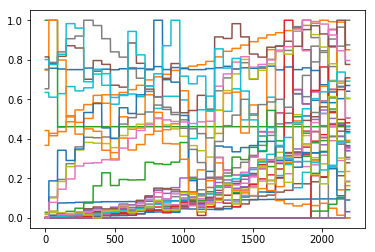

In [573]:
# you need to split your data into training and testing period using a window approach

# single split


from pandas import Series
from matplotlib import pyplot

train_size = int(len(rescaledX) * 0.66)
train, test = rescaledX[0:train_size], rescaledX[train_size:len(rescaledX)]
print('Observations: %d' % (len(rescaledX)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))
pyplot.plot(train)
pyplot.plot([None for i in train] + [x for x in test])
pyplot.show()

Observations: 1667
Training Observations: 834
Testing Observations: 833


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


accuracy: 0.7601918465227818
predicted class counts: Counter({1.0: 820, 0.0: 13})
RMSE: 74.87%
Log Loss: 19.36
AUC / ROC Score: 51.35%
[0.013 0.012 0.002 0.011 0.02  0.015 0.025 0.019 0.    0.    0.027 0.
 0.036 0.044 0.042 0.031 0.047 0.    0.049 0.011 0.015 0.018 0.067 0.073
 0.016 0.021 0.02  0.018 0.026 0.016 0.035 0.087 0.    0.    0.    0.031
 0.012 0.04  0.034 0.067]
Observations: 2500
Training Observations: 1667
Testing Observations: 833


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


accuracy: 0.7601918465227818
predicted class counts: Counter({0.0: 833})
RMSE: 53.23%
Log Loss: 9.79
AUC / ROC Score: 50.00%
[0.032 0.03  0.001 0.024 0.01  0.012 0.008 0.018 0.    0.    0.026 0.
 0.058 0.061 0.053 0.073 0.075 0.    0.049 0.021 0.008 0.017 0.031 0.026
 0.03  0.033 0.05  0.024 0.028 0.015 0.015 0.031 0.    0.    0.    0.018
 0.032 0.053 0.023 0.015]
Observations: 3333
Training Observations: 2500
Testing Observations: 833


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


accuracy: 0.7601918465227818
predicted class counts: Counter({0.0: 833})
RMSE: 65.92%
Log Loss: 15.01
AUC / ROC Score: 50.00%
[0.032 0.023 0.001 0.015 0.013 0.012 0.009 0.032 0.    0.    0.025 0.007
 0.04  0.047 0.065 0.053 0.099 0.    0.039 0.042 0.016 0.021 0.029 0.024
 0.032 0.035 0.043 0.021 0.019 0.02  0.021 0.04  0.002 0.001 0.005 0.014
 0.024 0.033 0.03  0.014]


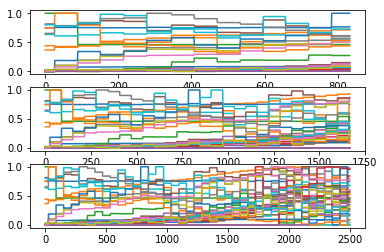

In [718]:
# Multiple splits using Sklearn package TimeSeries
# sklearn.model_selection.TimeSeriesSplit¶


from pandas import Series
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot

splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index = 1

for train_index, test_index in splits.split(rescaledX,rescaledY):
    train_X = rescaledX[train_index]
    train_Y = rescaledY[train_index]
    test_X = rescaledX[test_index]
    test_Y = rescaledY[test_index]
    
    print('Observations: %d' % (len(train_X) + len(test_X)))
    print('Training Observations: %d' % (len(train_X)))
    print('Testing Observations: %d' % (len(test_X)))
    pyplot.subplot(310 + index)
    pyplot.plot(train_X)
    #pyplot.plot([None for i in train] + [x for x in test])
    index += 1


    # build Random forest onlymodel

    rf = RandomForestClassifier(n_estimators=100, random_state=0)
    rf.fit(train_X, train_Y)
    print('accuracy:', confidence)
    predictions = rf.predict(test_X)
    print('predicted class counts:', Counter(predictions))
    

    logloss = metrics.log_loss(test_Y, predictions)
    auc = metrics.roc_auc_score(test_Y, predictions)
    rmse = np.sqrt(metrics.mean_squared_error(test_Y, predictions))
    print("RMSE: %.2f%%" % (rmse*100.0))
    print("Log Loss: %.2f" % (logloss))
    print("AUC / ROC Score: %.2f%%" % (auc*100.0))

    print(rf.feature_importances_)
    len(rf.feature_importances_)


pyplot.show()

In [619]:
import h2o

In [640]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_191"; Java(TM) SE Runtime Environment (build 1.8.0_191-b12); Java HotSpot(TM) 64-Bit Server VM (build 25.191-b12, mixed mode)
  Starting server from /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/ql/k_hwvkln74qd7l5pfq_clgcc0000gn/T/tmpk2nmampl
  JVM stdout: /var/folders/ql/k_hwvkln74qd7l5pfq_clgcc0000gn/T/tmpk2nmampl/h2o_atishparshotam_started_from_python.out
  JVM stderr: /var/folders/ql/k_hwvkln74qd7l5pfq_clgcc0000gn/T/tmpk2nmampl/h2o_atishparshotam_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,04 secs
H2O cluster timezone:,Africa/Johannesburg
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.1
H2O cluster version age:,19 days
H2O cluster name:,H2O_from_python_atishparshotam_bxwmdz
H2O cluster total nodes:,1
H2O cluster free memory:,910 Mb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [ ]:
from h2o.estimators.random_forest import 

In [619]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

Exception ignored in: <function Booster.__del__ at 0x114f16598>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/core.py", line 892, in __del__
    if self.handle is not None:
AttributeError: 'Booster' object has no attribute 'handle'


In [628]:
rf_v1 = H2ORandomForestEstimator(
    model_id="rf_covType_v1",
    ntrees=200,
    stopping_rounds=2,
    score_each_iteration=True,
    seed=1000000)

In [665]:
cov_x = h2o.H2OFrame(train_X)
cov_Y = h2o.H2OFrame(train_Y)
cov_trainX = h2o.H2OFrame(train_X)
cov_valY= h2o.H2OFrame(test_Y)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [666]:
rf_v1.train(cov_x, cov_Y, training_frame=cov_trainX, validation_frame=cov_valY)

C1
0
1
1
1
0
0
0
0
0
0


C1
0
1
1
1
0
0
0
0
0
0


H2OTypeError: Argument `y` should be a None | integer | string, got H2OFrame 

C1
0
1
1
1
0
0
0
0
0
0


In [638]:

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [671]:
# fit model no training data
model = XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
model.fit(train_X, train_Y.ravel(),eval_metric='auc')


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [672]:
# make predictions for test data
y_pred = model.predict(test_X)

In [673]:
predictions = [round(value) for value in y_pred]

In [674]:
# evaluate predictions
accuracy = accuracy_score(test_Y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 56.54%


In [685]:
from sklearn import metrics

logloss = metrics.log_loss(test_Y, predictions)
rmse = np.sqrt(metrics.mean_squared_error(test_Y, predictions))
print("RMSE: %.2f%%" % (rmse*100.0))
print("Log Loss: %.2f" % (logloss))

RMSE: 65.92%
Log Loss: 15.01


In [710]:

# fit model no training data
model = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 1,
                max_depth = 100, alpha = 10, n_estimators = 10, silent = False, n_jobs = 3, seed=1234 )
model.fit(train_X, train_Y.ravel())


[21:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=7
[21:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=9
[21:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=12
[21:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=13
[21:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=8
[21:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[21:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=8
[21:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=11
[21:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, m

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=1, max_delta_step=0,
       max_depth=100, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=3, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1234,
       silent=False, subsample=1)

In [716]:
logloss = metrics.log_loss(test_Y, predictions)
auc = metrics.roc_auc_score(test_Y, predictions)
rmse = np.sqrt(metrics.mean_squared_error(test_Y, predictions))
print("RMSE: %.2f%%" % (rmse*100.0))
print("Log Loss: %.2f" % (logloss))
print("AUC / ROC Score: %.2f%%" % (auc*100.0))

RMSE: 65.92%
Log Loss: 15.01
AUC / ROC Score: 50.00%
